In [1]:
from datetime import datetime

In [11]:
now = datetime.datetime.now()
now

datetime.datetime(2017, 11, 30, 0, 20, 35, 121006)

In [53]:
nowdate = now.strftime('%Y-%m-%d') ## %y가 소문자인경우 17 %Y 대문자: 2017로 표기
print(nowdate)## string 으로 변경됨 

2017-11-29


In [16]:
nowtime = now.strftime('%H:%M:%S')
type(nowtime)## string
nowtime

'00:20:35'

In [41]:
nowdatetime = now.strftime('%Y-%m-%d %H:%M:%S')
nowdatetime

'2017-11-29 00:09:37'

In [ ]:
## 날짜 시간형식의 문자열을 datetime으로 만드려면 strptime 함수사용

In [40]:
import datetime

mydatetimeSTR = '2015-11-29 12:21:34'## string 값 
mydatetime = datetime.datetime.strptime(mydatetimeSTR, '%Y-%m-%d %H:%M:%S')## datetime으로 변경 
## %Y 대문자표기
print(mydatetime)
mydatetime

2015-11-29 12:21:34


datetime.datetime(2015, 11, 29, 12, 21, 34)

In [60]:
yourdatetime = mydatetime.replace(month=9) ## 변경 
print(yourdatetime)
yourdatetime

2015-09-29 12:21:34


datetime.datetime(2015, 9, 29, 12, 21, 34)

In [65]:
d =datetime.date(2017,11,29) ## date & time 합치기 
t = datetime.time(12,33,56)
dt = datetime.datetime.combine(d,t)
print(dt)

2017-11-29 12:33:56


In [31]:
now = datetime.datetime.now()
print(now)

2017-11-30 00:29:53.896942


In [61]:
tomorrow = now+ datetime.timedelta(days = 1) ## 오늘 날짜에서 앞으로 1일 더하기
print(tomorrow)

2017-12-01 00:29:53.896942


In [33]:
secondslater = now +datetime.timedelta(microseconds = 2000000)
print(secondslater)

2017-11-30 00:29:55.896942


In [34]:
## datetime에서는 연산자를 지원함 

future = datetime.datetime(2018,2,9)
how_long = future - datetime.datetime.now() ## 연산자 지원  
how_long ## datetime.timedelta(70, 84758, 648982) 70일,84758 seconds남음 
how_long.days # 70
how_long.seconds ##84780  ## hours, months는 지원하지 않음 

"2018년 2월 9일까지는 {}일 {}시간이 남았습니다".format(how_long.days,how_long.seconds//3600)


'2018년 2월 9일까지는 70일 23시간이 남았습니다'

In [37]:
import datetime

def days_until_christmas():
    christmas_2030 = datetime.datetime(2030, 12, 25)
    days = (christmas_2030 - datetime.datetime.now()).days
    return days


print("2030년 크리스마스는 앞으로 {}일 남았습니다".format(days_until_christmas()))


2030년 크리스마스는 앞으로 4772일 남았습니다


In [59]:
import datetime
## 오늘로 부터 100일 후의 날짜에 정각 9시로 맞춰서 출력할것 
revised = datetime.datetime.now().replace(hour=9,minute = 0,second = 0)
hundred_after = datetime.timedelta(days=100)+revised

print("{}/{}/{}".format(hundred_after.year,hundred_after.month, hundred_after.day))
#datetime.datetime.now().month
hundred_after

2018/3/10


datetime.datetime(2018, 3, 10, 9, 0, 0, 317729)

2016년 1월 1일은 금요일입니다. 2016년 A월 B일은 무슨 요일일까요? 두 수 A,B를 입력받아 A월 B일이 무슨 요일인지 출력하는 getDayName 함수를 완성하세요. 요일의 이름은 일요일부터 토요일까지 각각

SUN,MON,TUE,WED,THU,FRI,SAT

를 출력해주면 됩니다. 예를 들어 A=5, B=24가 입력된다면 5월 24일은 화요일이므로 TUE를 반환하면 됩니다.

In [62]:
from datetime import datetime
def getDayName(a,b):

    weekdays = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    i = datetime(2016,a,b).weekday()
    return weekdays[i]
getDayName(3,14)

'MON'

In [82]:
## datetime을 이용한 카테고리 데이터 분석

In [85]:
import statsmodels.api as sm
df= sm.datasets.get_rdataset("nottem").data

In [2]:
import datetime
from calendar import isleap
import pandas as pd

def convert_year(number):
    year = int(number)
    d = datetime.timedelta(days = (number-year)*(365+isleap(year)))
    day_one = datetime.datetime(year,1,1)
    date = d + day_one
    return date

In [14]:
datetime.datetime(2017,1,1)

datetime.datetime(2017, 1, 1, 0, 0)

In [100]:
df["date0"] = df[["time"]].applymap(convert_year)
df["date"] = pd.DatetimeIndex(df["date0"]).round('60min') + datetime.timedelta(seconds=3600*24) 
df["month"] = df["date"].dt.strftime("%m").astype('category')
del df["date0"], df["date"]
df.tail()

,time,nottem,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


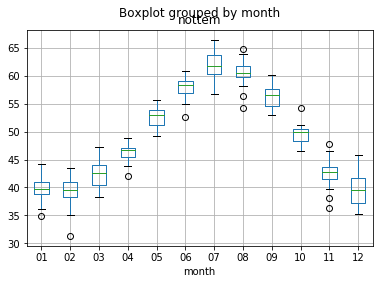

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot('nottem','month')